# SECOND VIDEO STARTS HERE
https://www.youtube.com/watch?v=TCH_1BHY58I

## Now let's try to predict more than one character

Next character in a sequence quickly blow up, the table size of counts table grows exponentially, if we only take a single character at a time, that's 27 posibilities, but if we take 2 characters and try to predict the next one, then 27 x 27, there's 729 posibilities, then if we take into context three chars, then suddenly we have 20000 posibilities, so there's way just too many rows of the matrix N, and doesn't work very well.

In [13]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
words = open("names.txt", 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [15]:
len(words)

32033

In [16]:
# build the vocabulary of characters and mappings to/from integers

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [17]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one
X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size

    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)
# this is kind of like a rolling window of context


emma
... ----> e
..e ----> m
.em ----> m
emm ----> a
mma ----> .
olivia
... ----> o
..o ----> l
.ol ----> i
oli ----> v
liv ----> i
ivi ----> a
via ----> .
ava
... ----> a
..a ----> v
.av ----> a
ava ----> .
isabella
... ----> i
..i ----> s
.is ----> a
isa ----> b
sab ----> e
abe ----> l
bel ----> l
ell ----> a
lla ----> .
sophia
... ----> s
..s ----> o
.so ----> p
sop ----> h
oph ----> i
phi ----> a
hia ----> .


In [18]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [19]:
# Let's cram the 27 possible characters into a two-dimensional space

C = torch.randn((27, 2), names=["characters", "embeddings_2D"])
C

/tmp/ipykernel_50797/871842550.py:3: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at ../c10/core/TensorImpl.h:1900.)
  C = torch.randn((27, 2), names=["characters", "embeddings_2D"])


tensor([[ 1.1648, -0.1378],
        [ 1.7277,  1.8922],
        [ 1.4556,  0.9094],
        [-0.8434, -1.8390],
        [ 0.1272,  1.5051],
        [-0.2540,  1.5209],
        [-0.3342,  0.4010],
        [ 0.7950, -0.3917],
        [ 0.2725, -0.7805],
        [ 0.5074, -0.2264],
        [-0.5915,  0.1337],
        [-0.2139,  0.3216],
        [ 0.0087,  0.0958],
        [-0.3569,  0.8148],
        [ 1.9910, -0.1962],
        [ 0.6446, -0.1950],
        [ 1.9922, -0.5181],
        [-0.0569,  0.8269],
        [-1.3216, -0.6827],
        [ 0.1031,  0.8188],
        [-0.4455, -0.9279],
        [ 0.7379, -0.6009],
        [-0.3339, -2.4705],
        [ 1.0739, -1.0943],
        [ 1.1200,  1.9541],
        [ 0.3015, -0.7300],
        [-0.5678,  0.1848]], names=('characters', 'embeddings_2D'))

In [20]:
# let's encode number 5, plucking out the sixth entry
C[5]

tensor([-0.2540,  1.5209], names=('embeddings_2D',))

In [21]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.2540,  1.5209], names=('embeddings_2D',))

In [22]:
C = C.rename(None)
C[[5, 6, 7]].rename(None)

tensor([[-0.2540,  1.5209],
        [-0.3342,  0.4010],
        [ 0.7950, -0.3917]])

In [23]:
C[torch.tensor([5, 6, 7])]

tensor([[-0.2540,  1.5209],
        [-0.3342,  0.4010],
        [ 0.7950, -0.3917]])

In [24]:
C[torch.tensor([5, 6, 7, 7, 7, 7])]

tensor([[-0.2540,  1.5209],
        [-0.3342,  0.4010],
        [ 0.7950, -0.3917],
        [ 0.7950, -0.3917],
        [ 0.7950, -0.3917],
        [ 0.7950, -0.3917]])

In [25]:
# torch indexing is awesome
C[X].shape

torch.Size([32, 3, 2])

In [26]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [27]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [28]:
C[X][13, 2]

tensor([1.7277, 1.8922])

In [29]:
C[1]

tensor([1.7277, 1.8922])

In [30]:
C

tensor([[ 1.1648, -0.1378],
        [ 1.7277,  1.8922],
        [ 1.4556,  0.9094],
        [-0.8434, -1.8390],
        [ 0.1272,  1.5051],
        [-0.2540,  1.5209],
        [-0.3342,  0.4010],
        [ 0.7950, -0.3917],
        [ 0.2725, -0.7805],
        [ 0.5074, -0.2264],
        [-0.5915,  0.1337],
        [-0.2139,  0.3216],
        [ 0.0087,  0.0958],
        [-0.3569,  0.8148],
        [ 1.9910, -0.1962],
        [ 0.6446, -0.1950],
        [ 1.9922, -0.5181],
        [-0.0569,  0.8269],
        [-1.3216, -0.6827],
        [ 0.1031,  0.8188],
        [-0.4455, -0.9279],
        [ 0.7379, -0.6009],
        [-0.3339, -2.4705],
        [ 1.0739, -1.0943],
        [ 1.1200,  1.9541],
        [ 0.3015, -0.7300],
        [-0.5678,  0.1848]])

In [31]:
# lookup table C
embeddings = C[X]
embeddings.shape

torch.Size([32, 3, 2])

In [32]:
embeddings

tensor([[[ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [ 1.1648, -0.1378]],

        [[ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [-0.2540,  1.5209]],

        [[ 1.1648, -0.1378],
         [-0.2540,  1.5209],
         [-0.3569,  0.8148]],

        [[-0.2540,  1.5209],
         [-0.3569,  0.8148],
         [-0.3569,  0.8148]],

        [[-0.3569,  0.8148],
         [-0.3569,  0.8148],
         [ 1.7277,  1.8922]],

        [[ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [ 1.1648, -0.1378]],

        [[ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [ 0.6446, -0.1950]],

        [[ 1.1648, -0.1378],
         [ 0.6446, -0.1950],
         [ 0.0087,  0.0958]],

        [[ 0.6446, -0.1950],
         [ 0.0087,  0.0958],
         [ 0.5074, -0.2264]],

        [[ 0.0087,  0.0958],
         [ 0.5074, -0.2264],
         [-0.3339, -2.4705]],

        [[ 0.5074, -0.2264],
         [-0.3339, -2.4705],
         [ 0.5074, -0.2264]],

        [[-0.3339, -2

In [33]:
embeddings.stride()

(6, 2, 1)

In [34]:
# implementing the hidden layer

W1 = torch.randn((6, 100)) # the number of inputs to this layer will be 3 x 2 = 6, because we have two dimensional embeddings and we have three of them; let's do 100 neurons
b1 = torch.randn(100)

In [35]:
# we can't do embeddings @ W1 + b1 because the embeddings are stacked up and tensor dimensions aren't fit with each other
# there are usually many ways to implement this, some are faster, some are shorter etc. torch is large

embeddings[:, 0, :], embeddings[:, 1, :], embeddings[:, 2, :]

(tensor([[ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [-0.2540,  1.5209],
         [-0.3569,  0.8148],
         [ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [ 0.6446, -0.1950],
         [ 0.0087,  0.0958],
         [ 0.5074, -0.2264],
         [-0.3339, -2.4705],
         [ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [ 1.7277,  1.8922],
         [ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [ 0.5074, -0.2264],
         [ 0.1031,  0.8188],
         [ 1.7277,  1.8922],
         [ 1.4556,  0.9094],
         [-0.2540,  1.5209],
         [ 0.0087,  0.0958],
         [ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [ 0.1031,  0.8188],
         [ 0.6446, -0.1950],
         [ 1.9922, -0.5181],
         [ 0.2725, -0.7805]]),
 tensor([[ 1.1648, -0.1378],
         [ 1.1648, -0.1378],
         [-0

In [36]:
torch.cat([embeddings[:, 0, :], embeddings[:, 1, :], embeddings[:, 2, :]], 1).shape

torch.Size([32, 6])

In [37]:
torch.cat(torch.unbind(embeddings, 1), 1).shape

torch.Size([32, 6])

In [38]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [39]:
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [40]:
# .view is extremely efficient
b = a.view(3, 3, 2)

In [41]:
b.storage()

/tmp/ipykernel_50797/3076968323.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  b.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [42]:
embeddings.view(32, 6)

tensor([[ 1.1648, -0.1378,  1.1648, -0.1378,  1.1648, -0.1378],
        [ 1.1648, -0.1378,  1.1648, -0.1378, -0.2540,  1.5209],
        [ 1.1648, -0.1378, -0.2540,  1.5209, -0.3569,  0.8148],
        [-0.2540,  1.5209, -0.3569,  0.8148, -0.3569,  0.8148],
        [-0.3569,  0.8148, -0.3569,  0.8148,  1.7277,  1.8922],
        [ 1.1648, -0.1378,  1.1648, -0.1378,  1.1648, -0.1378],
        [ 1.1648, -0.1378,  1.1648, -0.1378,  0.6446, -0.1950],
        [ 1.1648, -0.1378,  0.6446, -0.1950,  0.0087,  0.0958],
        [ 0.6446, -0.1950,  0.0087,  0.0958,  0.5074, -0.2264],
        [ 0.0087,  0.0958,  0.5074, -0.2264, -0.3339, -2.4705],
        [ 0.5074, -0.2264, -0.3339, -2.4705,  0.5074, -0.2264],
        [-0.3339, -2.4705,  0.5074, -0.2264,  1.7277,  1.8922],
        [ 1.1648, -0.1378,  1.1648, -0.1378,  1.1648, -0.1378],
        [ 1.1648, -0.1378,  1.1648, -0.1378,  1.7277,  1.8922],
        [ 1.1648, -0.1378,  1.7277,  1.8922, -0.3339, -2.4705],
        [ 1.7277,  1.8922, -0.3339, -2.4

In [43]:
embeddings.view(32, 6).shape == torch.cat(torch.unbind(embeddings, 1), 1).shape == torch.cat([embeddings[:, 0, :], embeddings[:, 1, :], embeddings[:, 2, :]], 1).shape

True

In [44]:
# using -1, so we won't hardcode numbers, when we do -1, torch will infer what this should be
h = embeddings.view(-1, 6)
h.shape

torch.Size([32, 6])

In [45]:
W1 = torch.randn((6, 100)) # the number of inputs to this layer will be 3 x 2 = 6, because we have two dimensional embeddings and we have three of them; let's do 100 neurons
b1 = torch.randn(100)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1) # bias will be added to all elements in the rows
print(h.shape)
print(b1.shape)
h

torch.Size([32, 100])
torch.Size([100])


tensor([[ 0.9900, -0.9859,  0.9878,  ..., -0.9742, -0.9980,  0.4739],
        [ 0.5073, -0.5398,  0.9974,  ..., -0.9272, -1.0000, -0.8574],
        [ 0.9546,  0.1871,  0.9988,  ..., -0.9990, -0.9918,  0.8317],
        ...,
        [ 0.9959, -0.9877,  0.8253,  ...,  0.9675, -0.9902,  0.4562],
        [ 1.0000,  0.9229,  0.9824,  ..., -0.9555, -0.9661,  0.3665],
        [-0.9975, -0.9991,  0.9411,  ..., -0.9996, -1.0000, -0.2284]])

In [46]:
# let's create the final layer

W2 = torch.randn((100, 27)) # the input now will be 100 because the hidden layer has 100 outputs, the output number of these neurons will be 27 because we have 27 possible characters
b2 = torch.randn(27) # biases will be 27 as well

logits = h @ W2 + b2
logits[:3]

tensor([[ -0.3963,  -4.1686,  12.4045,  -2.4204, -15.3439,   1.2735,   4.5355,
          -2.7824,   1.5581,   5.3886,  10.1223,   6.5240,  -3.9795,   1.0713,
           8.8394,  -7.8710,   1.6664, -18.9376,  -5.9171,   2.8753,  -8.9827,
          -5.1345,   5.6168,   1.1265,  10.5386,   2.6010,   6.9520],
        [  4.5442,  -2.7826,  19.1731,   1.0080,  -6.7958,  -1.4848,   1.7074,
          -2.0462,  -4.4853,  -3.9645,   8.8982,   5.4513,  -3.8133,   3.1692,
          12.2262,  -4.0793,  -2.1051,   0.9600,   8.7585,   7.3781, -16.7119,
           1.2086,   3.2636,   4.8897,   5.0548,  12.8442,  -0.6450],
        [ -5.6363,  -6.9298,  10.2612,  -3.4710,  -4.3298,   0.6812,  -1.2318,
          -8.8883,  -7.0266,  -8.3140,  -9.4251,   5.6370,  -1.2150,   8.9701,
          -7.2594,  -0.0453,   1.4932,  -3.3244,   4.9648,   0.3808,  -8.8114,
           4.7079,   8.7959,   8.2579,   1.9624,   6.5827,   9.2515]])

In [47]:
logits.shape

torch.Size([32, 27])

In [48]:
counts = logits.exp()
counts[:3]

tensor([[6.7278e-01, 1.5473e-02, 2.4391e+05, 8.8884e-02, 2.1688e-07, 3.5732e+00,
         9.3269e+01, 6.1887e-02, 4.7499e+00, 2.1890e+02, 2.4892e+04, 6.8128e+02,
         1.8696e-02, 2.9193e+00, 6.9009e+03, 3.8167e-04, 5.2930e+00, 5.9633e-09,
         2.6930e-03, 1.7731e+01, 1.2556e-04, 5.8897e-03, 2.7501e+02, 3.0849e+00,
         3.7745e+04, 1.3477e+01, 1.0452e+03],
        [9.4086e+01, 6.1876e-02, 2.1220e+08, 2.7402e+00, 1.1185e-03, 2.2655e-01,
         5.5146e+00, 1.2922e-01, 1.1273e-02, 1.8977e-02, 7.3191e+03, 2.3305e+02,
         2.2076e-02, 2.3789e+01, 2.0407e+05, 1.6920e-02, 1.2184e-01, 2.6117e+00,
         6.3645e+03, 1.6005e+03, 5.5223e-08, 3.3486e+00, 2.6145e+01, 1.3292e+02,
         1.5677e+02, 3.7860e+05, 5.2467e-01],
        [3.5661e-03, 9.7820e-04, 2.8602e+04, 3.1086e-02, 1.3170e-02, 1.9763e+00,
         2.9175e-01, 1.3799e-04, 8.8797e-04, 2.4507e-04, 8.0675e-05, 2.8062e+02,
         2.9672e-01, 7.8647e+03, 7.0351e-04, 9.5573e-01, 4.4512e+00, 3.5994e-02,
         1.4327e+

In [49]:
prob = counts / counts.sum(1, keepdim=True)
prob[:3]

tensor([[2.1303e-06, 4.8996e-08, 7.7232e-01, 2.8145e-07, 6.8673e-13, 1.1314e-05,
         2.9533e-04, 1.9596e-07, 1.5040e-05, 6.9314e-04, 7.8821e-02, 2.1572e-03,
         5.9199e-08, 9.2438e-06, 2.1851e-02, 1.2085e-09, 1.6760e-05, 1.8882e-14,
         8.5273e-09, 5.6144e-05, 3.9759e-10, 1.8650e-08, 8.7079e-04, 9.7683e-06,
         1.1952e-01, 4.2674e-05, 3.3097e-03],
        [4.4213e-07, 2.9077e-10, 9.9719e-01, 1.2877e-08, 5.2559e-12, 1.0646e-09,
         2.5914e-08, 6.0724e-10, 5.2974e-11, 8.9176e-11, 3.4394e-05, 1.0952e-06,
         1.0374e-10, 1.1179e-07, 9.5897e-04, 7.9510e-11, 5.7254e-10, 1.2273e-08,
         2.9908e-05, 7.5210e-06, 2.5951e-16, 1.5736e-08, 1.2286e-07, 6.2461e-07,
         7.3668e-07, 1.7791e-03, 2.4655e-09],
        [6.0828e-08, 1.6685e-08, 4.8787e-01, 5.3024e-07, 2.2464e-07, 3.3710e-05,
         4.9765e-06, 2.3538e-09, 1.5146e-08, 4.1803e-09, 1.3761e-09, 4.7866e-03,
         5.0613e-06, 1.3415e-01, 1.2000e-08, 1.6302e-05, 7.5925e-05, 6.1396e-07,
         2.4439e-

In [50]:
prob[0].sum()

tensor(1.0000)

In [51]:
# index into the rows of prob and in each row pluck out the probability assigned to the correct character
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [52]:
prob[torch.arange(32), Y]

tensor([1.1314e-05, 1.1179e-07, 1.3415e-01, 9.0262e-14, 2.1714e-05, 1.2085e-09,
        5.5044e-09, 1.5758e-06, 1.0937e-04, 9.7413e-08, 1.0084e-13, 1.9065e-07,
        4.8996e-08, 6.2953e-09, 6.8417e-09, 5.2594e-09, 6.9314e-04, 4.4991e-03,
        3.4007e-11, 7.2993e-01, 5.2819e-02, 2.3706e-12, 2.4036e-09, 3.1107e-13,
        7.2089e-09, 5.6144e-05, 3.6032e-10, 8.6830e-04, 8.5906e-09, 4.1779e-04,
        5.5915e-08, 1.4338e-08])

In [53]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(15.6633)

### Rewrite

In machine learning, parameters and hyperparameters are fundamental concepts.

    Parameters: Parameters are the internal variables whose values are learned from the training data during the model fitting process. These parameters define the structure and behavior of the model. For example, in a simple linear regression model, parameters would be the coefficients and the intercept. In a neural network, parameters would include the weights and biases of the neurons in each layer.

    Hyperparameters: Hyperparameters are external configuration settings that are not learned from the data but are set prior to the training process. They control the learning process and the overall behavior of the model. Examples of hyperparameters include the learning rate, regularization strength, number of hidden layers in a neural network, and the choice of algorithm itself.

The key differences between parameters and hyperparameters are:

    Parameters are learned during the training process, while hyperparameters are set before the training process.
    Parameters are specific to the model and its structure, while hyperparameters are external factors that affect the learning process.

Tuning hyperparameters effectively is crucial for optimizing a model's performance. This process often involves experimentation, such as using techniques like grid search or random search to find the best combination of hyperparameters for a given task and dataset.

    C, W1, b1, W2, and b2 are tensors. These tensors represent the weights and biases of a neural network. They are learned during the training process and directly affect the behavior of the model based on the data. Therefore, they are parameters.

    Hyperparameters, on the other hand, are external settings that control the learning process itself, such as the learning rate, regularization strength, or the structure of the network (e.g., number of layers, number of neurons per layer). These hyperparameters are not learned from the data but are set by the user before the training process begins.

In [54]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [55]:
g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn((27), generator=g)
parameters = [C, W1, b1, W2, b2]

In [56]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [57]:
# forward pass
embeddings = C[X] # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1) # (32, 100) 
logits = h @ W2 + b2 # (32, 27)

# embeddings = C[X] performs the first step of the forward pass, where the input X is used to index into the tensor C to obtain the corresponding embeddings. This step transforms the input into a higher-dimensional representation based on the embedding matrix C.
# h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1) represents the propagation of the transformed input through the first hidden layer of the neural network. It computes the activations of the neurons in the hidden layer using the hyperbolic tangent (tanh) activation function.
# logits = h @ W2 + b2 calculates the final logits by propagating the activations from the hidden layer through the output layer of the neural network.
# These three lines together constitute the forward pass of the neural network, where input data is processed through the layers of the network to generate predictions.

# counts = logits.exp()                             |
# prob = counts / counts.sum(1, keepdims=True)      |  ---> negative log likelihood loss
# loss = -prob[torch.arange(32), Y].log().mean()    |

# softmax
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)

# loss
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.7697)

In [58]:
# let's make this even more respectable

# counts = logits.exp()                             |
# prob = counts / counts.sum(1, keepdims=True)      |  ---> negative log likelihood loss
# loss = -prob[torch.arange(32), Y].log().mean()    |

# what we did in the cell above is classification and for this there's cross_entropy function in pytorch.
# we can simply call F.cross_entropy, pass in the logits and the array of targets Y, and this calculates the exact same loss

F.cross_entropy(logits, Y)

# when you use f.cross entropy by torch will not actually create all those intermediate tensors from the above cell, because these are all new tensors in memory and all this is fairly inefficient to run

tensor(17.7697)

In [59]:
# also cross_entropy is very well behaved
# bad behavior down here, when one logit is very positive, you get a nan

logits = torch.tensor([-100, -3, 0, 100])
counts = logits.exp()
probs = counts / counts.sum()
print(counts)
probs

tensor([3.7835e-44, 4.9787e-02, 1.0000e+00,        inf])


tensor([0., 0., 0., nan])

In [60]:
# the way pytorch solved this is by offsetting the problematic number by itself.

logits = torch.tensor([-100, -3, 0, 100]) - 100
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

### implementing the training loop, overfitting one batch

In [61]:
for p in parameters:
    p.requires_grad = True

In [62]:
for _ in range(10):
    # forward pass
    embeddings = C[X] # (32, 3, 2)
    h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1) # (32, 100) 
    logits = h @ W2 + b2 # (32, 27)

    loss = F.cross_entropy(logits, Y)

    print(loss.item())

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data += -0.1 * p.grad

17.76971435546875
13.656401634216309
11.298768997192383
9.452455520629883
7.984262466430664
6.891321182250977
6.100014686584473
5.452036380767822
4.898151874542236
4.414664268493652


In [63]:
# run for a thousand times we get a very very low loss and that means that we're making very good predictions
# now the reason that this is so straightforward right now is because we're only overfitting 32 examples,
# so we only have 32 examples of the first 5 words and therefore it's very easy to make this neural net fit only these two 32 examples
# because we have 3400 parameters and only 32 examples so we're doing what's called overfitting a single batch of the data and getting a very low loss and good predictions, but that's just because we have so many parameters for so few examples so it's easy to make this be very low

for _ in range(1000):
    # forward pass
    embeddings = C[X] # (32, 3, 2)
    h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1) # (32, 100) 
    logits = h @ W2 + b2 # (32, 27)

    loss = F.cross_entropy(logits, Y)

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    # update
    for p in parameters:
        p.data += -0.1 * p.grad

print(loss.item())

0.25609633326530457


In [64]:
# Moving tensors to the GPU

g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn((27), generator=g)

# Define the parameters list
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

# Move tensors to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
C = C.to(device)
W1 = W1.to(device)
b1 = b1.to(device)
W2 = W2.to(device)
b2 = b2.to(device)
X = X.to(device)
Y = Y.to(device)

In [65]:
# Training loop
for _ in range(1000):
    with torch.cuda.device(device):
        # Forward pass
        embeddings = C[X]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y)

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        for p in parameters:
            p.data += -0.1 * p.grad

print(loss.item())

17.769710540771484


In [66]:
logits.max(1) # we cannot make loss be 0 because we have three dots have possible outcomes such as e, o, a, i, an so on. out of the dataset

torch.return_types.max(
values=tensor([21.6638, 26.2643, 25.9028, 20.5271, 19.7233, 21.6638, 27.8875, 18.4312,
        17.8855, 12.3067, 16.3167, 14.7824, 21.6638, 20.7853, 14.9944, 17.8890,
        21.6638, 21.3690, 18.6206, 17.2354, 11.1006, 17.4859, 15.9277, 13.6605,
        15.6246, 21.6638, 21.0790, 14.4026, 14.7089, 23.1252, 15.9744, 24.1714],
       device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([10, 10,  9, 14, 10, 10, 10, 26,  9, 21,  2, 14, 10, 10, 10, 22, 10, 10,
        10, 10, 14, 10, 26, 23, 20, 10, 10, 10, 23,  9, 14, 10],
       device='cuda:0'))

In [67]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0],
       device='cuda:0')

In [68]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one
X, Y = [], []

for w in words:
    #print(w)
    context = [0] * block_size

    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)
# this is kind of like a rolling window of context

In [69]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [70]:
C = torch.randn((27, 2))

In [71]:
embeddings = C[X]
embeddings.shape

torch.Size([228146, 3, 2])

In [72]:
# Moving tensors to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 2), generator=g).to(device)
W1 = torch.randn((6, 100), generator=g).to(device)
b1 = torch.randn(100, generator=g).to(device)
W2 = torch.randn((100, 27), generator=g).to(device)
b2 = torch.randn((27), generator=g).to(device)



# Define the parameters list
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

# Move tensors to GPU

embeddings = C[X]
embeddings.to(device)

X = X.to(device)
Y = Y.to(device)

In [73]:
sum(p.nelement() for p in parameters) # number of parameters in total

3481

In [74]:
# Training loop
for _ in range(10):
    #with torch.cuda.device(device):
        # Forward pass
        embeddings = C[X]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y)
        print(loss.item())

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        for p in parameters:
            p.data += -0.1 * p.grad


19.505231857299805
17.084461212158203
15.776474952697754
14.833340644836426
14.002630233764648
13.25328540802002
12.579960823059082
11.983065605163574
11.470518112182617
11.051850318908691


In [75]:
# we're doing way too much work forwarding and backwarding 220000 examples
# in practice what people usually do is they perform forward and backward pass and update on minibatches of the data
# will do a random select of some portion of the dataset, that's a minibatch, and then only forward backward and update on that little mini batch and then we iterate on those many batches

torch.randint(0, 5, (32,))

tensor([3, 3, 3, 4, 3, 2, 3, 2, 1, 1, 0, 1, 1, 4, 3, 0, 2, 1, 2, 0, 2, 0, 3, 3,
        3, 3, 3, 3, 4, 3, 4, 0])

In [76]:
torch.randint(0, X.shape[0], (32,))

tensor([216236,  45160,  32676, 213439,   2949, 179586,   3713,  26587, 171252,
         38121,  72109, 223856, 180362, 212878, 217569, 153152,  96354,  97886,
         91221, 191517, 153593,  53033,  53776, 165232,  69853,  21930, 151724,
        118758,  63668,  27198,  90861,  14161])

In [77]:
# Training loop

for _ in range(10):
    #with torch.cuda.device(device):
        
        # minibatch construct
        ix = torch.randint(0, X.shape[0], (32,)) # added here to grab 32 rows of X

        # Forward pass
        embeddings = C[X[ix]]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y[ix])
        print(loss.item())

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        for p in parameters:
            p.data += -0.1 * p.grad

# the quality of our gradient is lower, the direction is not as reliable it's not the actual gradient direction
# it's much better to have an approximate gradient and just make more steps than it is to evaluate the exact gradient and take fewer steps so that's why in practice, this works quite well         

10.646188735961914
10.909506797790527
10.919975280761719
8.260517120361328
7.557425022125244
6.380773067474365
9.862829208374023
9.230061531066895
11.670668601989746
8.328222274780273


In [78]:
# the total loss

embeddings = C[X]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(8.5898, device='cuda:0', grad_fn=<NllLossBackward0>)

In [79]:
# Training loop

for _ in range(100):
    #with torch.cuda.device(device):
        
        # minibatch construct
        ix = torch.randint(0, X.shape[0], (32,))

        # Forward pass
        embeddings = C[X[ix]]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y[ix])
        

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        for p in parameters:
            p.data += -0.1 * p.grad
print(loss.item())
# the quality of our gradient is lower so the direction is not as reliable it's not the actual gradient direction

2.8714537620544434


In [80]:
# the total loss, for all of X and all of Y

embeddings = C[X]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(3.5005, device='cuda:0', grad_fn=<NllLossBackward0>)

In [81]:
print(1e0)

1.0


In [82]:
import torch

learn_rate = torch.linspace(-3, 0, 1000)   # torch.linspace(0.001, 1, 1000)
print(learn_rate[0:10])
learn_rate[-50:]

tensor([-3.0000, -2.9970, -2.9940, -2.9910, -2.9880, -2.9850, -2.9820, -2.9790,
        -2.9760, -2.9730])


tensor([-0.1471, -0.1441, -0.1411, -0.1381, -0.1351, -0.1321, -0.1291, -0.1261,
        -0.1231, -0.1201, -0.1171, -0.1141, -0.1111, -0.1081, -0.1051, -0.1021,
        -0.0991, -0.0961, -0.0931, -0.0901, -0.0871, -0.0841, -0.0811, -0.0781,
        -0.0751, -0.0721, -0.0691, -0.0661, -0.0631, -0.0601, -0.0571, -0.0541,
        -0.0511, -0.0480, -0.0450, -0.0420, -0.0390, -0.0360, -0.0330, -0.0300,
        -0.0270, -0.0240, -0.0210, -0.0180, -0.0150, -0.0120, -0.0090, -0.0060,
        -0.0030,  0.0000])

In [83]:
10**-3

0.001

In [84]:
learn_rate = torch.linspace(-3, 0, 1000)
learn_rate_exponent = 10**learn_rate # spaced exponentially in this interval we get the same as the linear way of using linspace..see above comment.. 10**-3 = 0.001
learn_rate_exponent

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [85]:
# continuing the optimization

# Training loop
lri = [] # the learning rates that we used
lossi = [] #losses

for i in range(1000):
    #with torch.cuda.device(device):
        
        # minibatch construct
        ix = torch.randint(0, X.shape[0], (32,))

        # Forward pass
        embeddings = C[X[ix]]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y[ix])
        

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        learning_rate = learn_rate_exponent[i]
        for p in parameters:
            p.data += -learning_rate * p.grad

        # track stats
        lri.append(learning_rate)
        lossi.append(loss.item())
    
print(loss.item())
# the quality of our gradient is lower so the direction is not as reliable it's not the actual gradient direction

6.281491279602051


In [86]:
# the total loss

embeddings = C[X]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(6.1893, device='cuda:0', grad_fn=<NllLossBackward0>)

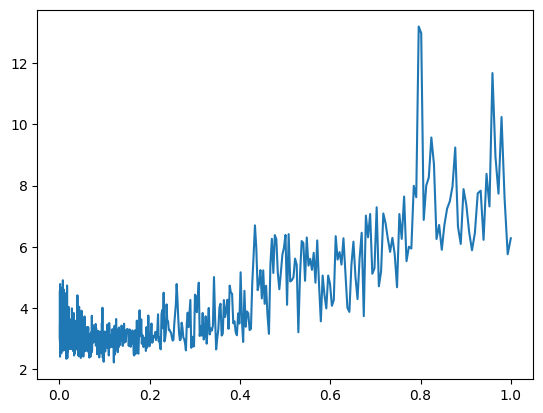

In [87]:
# plot where in the beginning you had very low learning rates so the nice spot is somewhere around 0.1 or 0.2 learning rate
plt.plot(lri, lossi)

In [88]:
# continuing the optimization
learn_rate = torch.linspace(-3, 0, 1000)
learn_rate_exponent = 10**learn_rate

# Training loop
lri = []
lossi = []

for i in range(1000):
    #with torch.cuda.device(device):
        
        # minibatch construct
        ix = torch.randint(0, X.shape[0], (32,))

        # Forward pass
        embeddings = C[X[ix]]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y[ix])
        

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        learning_rate = learn_rate_exponent[i]
        for p in parameters:
            p.data += -learning_rate * p.grad

        # track stats
        lri.append(learn_rate[i]) # added i here
        lossi.append(loss.item())
    
print(loss.item())
# the quality of our gradient is lower so the direction is not as reliable it's not the actual gradient direction

8.27756118774414


In [89]:
# the total loss

embeddings = C[X]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(6.9401, device='cuda:0', grad_fn=<NllLossBackward0>)

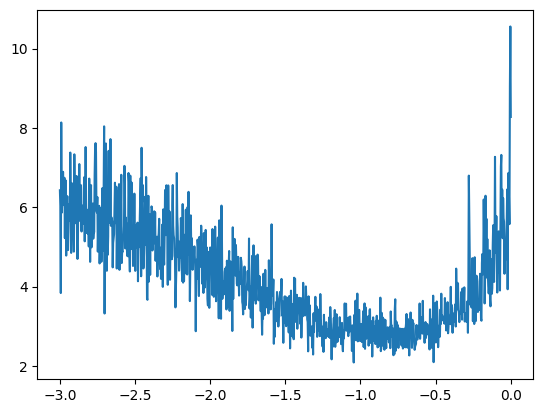

In [90]:
# now on the x axis we have the exponent of the learning rate and so we can see the exponent of the learning rate that is good to use. Lowest point in the valley, so 10**-1 is 0.1, and this is actually what we have used before and is a pretty good setting (hyperparameter)
plt.plot(lri, lossi)

In [92]:
# continuing the optimization
# learn_rate = torch.linspace(-3, 0, 1000)
# learn_rate_exponent = 10**learn_rate

# Training loop
# lri = []
# lossi = []

for i in range(20000): # we crank up iterations
        # minibatch construct
        ix = torch.randint(0, X.shape[0], (32,))

        # Forward pass
        embeddings = C[X[ix]]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y[ix])
        

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        #learning_rate = learn_rate_exponent[i]
        learning_rate = 0.1 # we have our good hyperparameter here

        for p in parameters:
            p.data += -learning_rate * p.grad

        # track stats
        # lri.append(learn_rate[i]) # added i here
        # lossi.append(loss.item())
    
#print(loss.item())

In [93]:
# the total loss

embeddings = C[X]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.3474, device='cuda:0', grad_fn=<NllLossBackward0>)

In [94]:
for i in range(10000): # we crank up iterations
        # minibatch construct
        ix = torch.randint(0, X.shape[0], (32,))

        # Forward pass
        embeddings = C[X[ix]]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y[ix])
        

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        learning_rate = 0.01 # now we do learning rate decay in our last round of training by changing the learning rate by a factor of 10..so instead of 0.1 we use 0.01 now, so the score has a chance to improve 

        for p in parameters:
            p.data += -learning_rate * p.grad

        # track stats

    
#print(loss.item())

In [100]:
# the total loss

embeddings = C[X]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.2951, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
# if we increase the number of parameters, our model has the potential to overfit data, if we get to big numbers like milions of billions, and have a small dataset, we will most likely overfit (loss could be as low as 0), and loss on test data might be very high
sum(p.nelement() for p in parameters) # number of parameters in total

3481

### Dataset Splitting

In [116]:
# training split, dev/validation split, test split. Training set of data is used for training parameters(obviously), dev/validation split is used for training the hyperparameters, and test split is used to evaluate the performance of the model
# 80%, 10%, 10%
# on the test split we evaluate our test loss very very sparingly, a few times, because every single time you evaluate your test loss, you are basically starting to also train on the test split
words = open("names.txt", 'r').read().splitlines()
# build the vocabulary of characters and mappings to/from integers

chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

# Moving tensors to the GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def build_dataset(words):
    block_size = 3 # context length: how many character do we take to predict the next one
    X, Y = [], []

    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix] # crop and append
    
    X = torch.tensor(X).to(device)
    Y = torch.tensor(Y).to(device)
    print(X.shape, Y.shape)

    return X, Y

# shuffling of the words

import random

random.seed(42)
random.shuffle(words) # the words are now shuffled between themselves

split_80 = int(0.8*len(words)) # used to index 80% of the words
split_90 = int(0.9*len(words)) # used to index 10%

X_train, Y_train = build_dataset(words[:split_80])
X_dev, Y_dev = build_dataset(words[split_80:split_90])
X_test, Y_test = build_dataset(words[split_90:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [117]:
split_80, split_90 # these are the individual examples made out from those words

(25626, 28829)

In [118]:
split_90 - split_80

3203

### Now we have X's and Y's for all three splits

In [119]:
X_train, Y_train

(tensor([[ 0,  0,  0],
         [ 0,  0, 25],
         [ 0, 25, 21],
         ...,
         [15, 12,  4],
         [12,  4,  1],
         [ 4,  1, 14]], device='cuda:0'),
 tensor([25, 21,  8,  ...,  1, 14,  0], device='cuda:0'))

In [120]:
g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 2), generator=g).to(device)
W1 = torch.randn((6, 100), generator=g).to(device)
b1 = torch.randn(100, generator=g).to(device)
W2 = torch.randn((100, 27), generator=g).to(device)
b2 = torch.randn((27), generator=g).to(device)

# Define the parameters list
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [108]:
# learn_rate = torch.linspace(-3, 0, 1000)
# learn_rate_exponent = 10**learn_rate # spaced exponentially in this interval we get the same as the linear way of using linspace..see above comment.. 10**-3 = 0.001

In [125]:
# Training loop, we now use the Training split

# lri = []
# lossi = []

for i in range(10000):
    #with torch.cuda.device(device):
        
        # minibatch construct
        ix = torch.randint(0, X_train.shape[0], (32,))

        # Forward pass
        embeddings = C[X_train[ix]]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y_train[ix])
        

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        #learning_rate = learn_rate_exponent[i]
        learning_rate = 0.01
        for p in parameters:
            p.data += -learning_rate * p.grad

        # # track stats
        # lri.append(learn_rate[i]) # added i here
        # lossi.append(loss.item())
    
#print(loss.item())


In [126]:
print(loss.item())

2.270780324935913


In [127]:
# the total loss for training split

embeddings = C[X_train]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.4772, device='cuda:0', grad_fn=<NllLossBackward0>)

In [129]:
# the total loss for validation split

embeddings = C[X_dev]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y_dev)
loss

tensor(2.4706, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
# because the loss on train and validation splits is almost the same, are roughly equal, what that typically means is that our network is very tiny very small and we expect to make performance improvements by scaling
# up the size of this neural net
# so let's do that now so let's come over here and let's increase the size of this NN

In [130]:
g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 2), generator=g).to(device)
W1 = torch.randn((6, 300), generator=g).to(device)
b1 = torch.randn(300, generator=g).to(device)
W2 = torch.randn((300, 27), generator=g).to(device)
b2 = torch.randn((27), generator=g).to(device)

# Define the parameters list
parameters = [C, W1, b1, W2, b2]
for p in parameters:
    p.requires_grad = True

In [131]:
sum(p.nelement() for p in parameters) # number of parameters in total

10281

In [153]:
# Training loop, we now use the training split

# lri = []
lossi = []
stepi = []

for i in range(30000):
    #with torch.cuda.device(device):
        
        # minibatch construct
        ix = torch.randint(0, X_train.shape[0], (32,))

        # Forward pass
        embeddings = C[X_train[ix]]  # (32, 3, 2)
        h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y_train[ix])
        

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        #learning_rate = learn_rate_exponent[i]
        learning_rate = 0.01
        for p in parameters:
            p.data += -learning_rate * p.grad

        # # track stats
        # lri.append(learn_rate[i]) # added i here
        lossi.append(loss.item())
        stepi.append(i)
    
#print(loss.item())


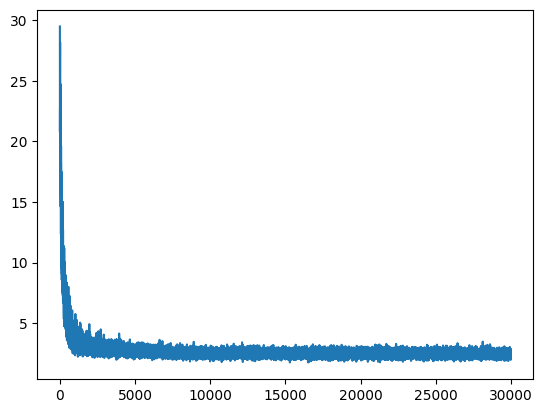

In [133]:
# you see that there's quite a bit of thickness to this and that's because we are optimizing over these mini batches
# and the mini batches create a little bit of noise

plt.plot(stepi, lossi)

In [134]:
# the total loss for training split

embeddings = C[X_train]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.4342, device='cuda:0', grad_fn=<NllLossBackward0>)

In [135]:
# the total loss for validation split

embeddings = C[X_dev]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y_dev)
loss

tensor(2.4292, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
# bigger NN, it might take longer for this neural net to converge, so let's continue training

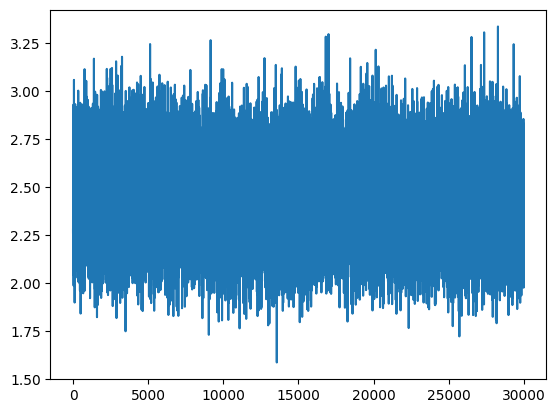

In [137]:
plt.plot(stepi, lossi)

In [154]:
# the total loss for training split

embeddings = C[X_train]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.3275, device='cuda:0', grad_fn=<NllLossBackward0>)

In [155]:
# the total loss for validation split

embeddings = C[X_dev]  # (32, 3, 2)
h = torch.tanh(embeddings.view(-1, 6) @ W1 + b1)  # (32, 100)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y_dev)
loss

tensor(2.3315, device='cuda:0', grad_fn=<NllLossBackward0>)

In [156]:
C[:,0].data

tensor([ 0.4141, -0.0178,  0.2222,  0.1384,  0.0492, -0.1842,  0.1456,  0.5381,
        -0.0522, -0.3681, -0.0709,  0.0697, -0.1650,  0.0844, -0.5162, -0.1559,
         0.2589, -0.1391, -0.2371,  0.0451,  0.0707, -0.1980,  0.0313,  0.0234,
        -0.2533, -0.5502, -0.0089], device='cuda:0')

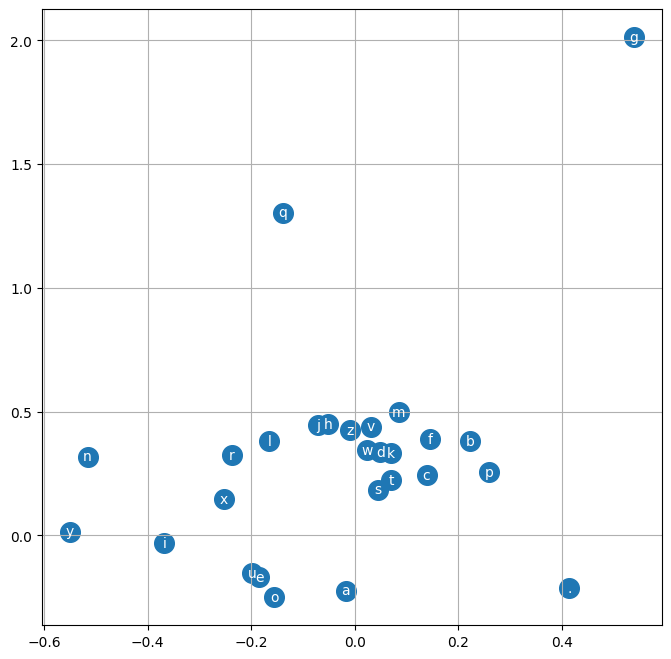

In [157]:
# visualize the embedding vectors, before we scale up the embedding size from two because we'd like to make this bottleneck potentially go away
plt.figure(figsize=(8, 8))
plt.scatter(C[:,0].data.cpu(), C[:,1].data.cpu(), s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].cpu().item(), C[i, 1].cpu().item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [158]:
# We now increase the embeddings dimensions
X_train.shape, Y_train.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [174]:
g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 10), generator=g).to(device) # we changed here from 2 to 10 dimensions
W1 = torch.randn((30, 200), generator=g).to(device) # because we have size of X to be 3 (block_size?) we multiply the increased dimension 10 x 3 to get 30 input which will go into the hidden layer
b1 = torch.randn(200, generator=g).to(device)
W2 = torch.randn((200, 27), generator=g).to(device) # we make the hidden layer a bit smaller to 200 neurons
b2 = torch.randn((27), generator=g).to(device)

# Define the parameters list
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [175]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [176]:
# moved this out so we won't wipe out our loss stats when we rerun the training cell from below
lri = []
lossi = []
stepi = []

In [190]:
for i in range(50000):
    #with torch.cuda.device(device):
        
        # minibatch construct
        ix = torch.randint(0, X_train.shape[0], (32,))

        # Forward pass
        embeddings = C[X_train[ix]]  # (182625, 3, 10)
        h = torch.tanh(embeddings.view(-1, 30) @ W1 + b1)  # (32, 200) Here we have to be carefull, because of the hardcoded 6 -- h = torch.tanh(embeddings.view(-1, 6) -- , this should be 30 now
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y_train[ix])
        

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        #learning_rate = learn_rate_exponent[i]
        learning_rate = 0.01
        for p in parameters:
            p.data += -learning_rate * p.grad

        # # track stats
        # lri.append(learn_rate[i]) # added i here
        lossi.append(loss.log10().item())               # we added here log10()
        stepi.append(i)
    
#print(loss.item())


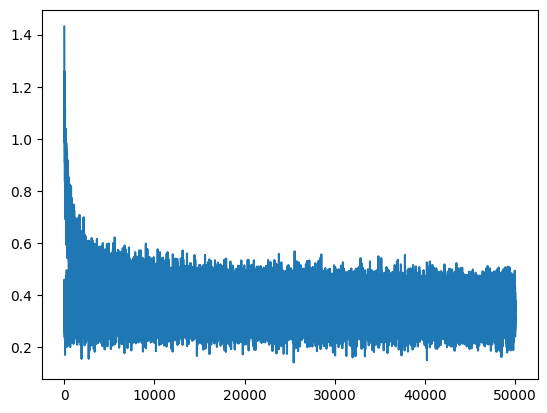

In [187]:
plt.plot(stepi, lossi)

In [180]:
C[X_train].shape

torch.Size([182625, 3, 10])

In [181]:
h = torch.tanh(embeddings.view(-1, 30) @ W1 + b1)
h.shape

torch.Size([32, 200])

In [167]:
logits = h @ W2 + b2 
logits.shape

torch.Size([32, 27])

In [188]:
# the total loss for training split

embeddings = C[X_train]  # (182625, 3, 10)
h = torch.tanh(embeddings.view(-1, 30) @ W1 + b1)  # (32, 200)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.1746, device='cuda:0', grad_fn=<NllLossBackward0>)

In [183]:
C[X_dev].shape

torch.Size([22655, 3, 10])

In [189]:
# the total loss for validation split

embeddings = C[X_dev]  # (22655, 3, 10)
h = torch.tanh(embeddings.view(-1, 30) @ W1 + b1)  # (32, 200)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y_dev)
loss

tensor(2.2043, device='cuda:0', grad_fn=<NllLossBackward0>)

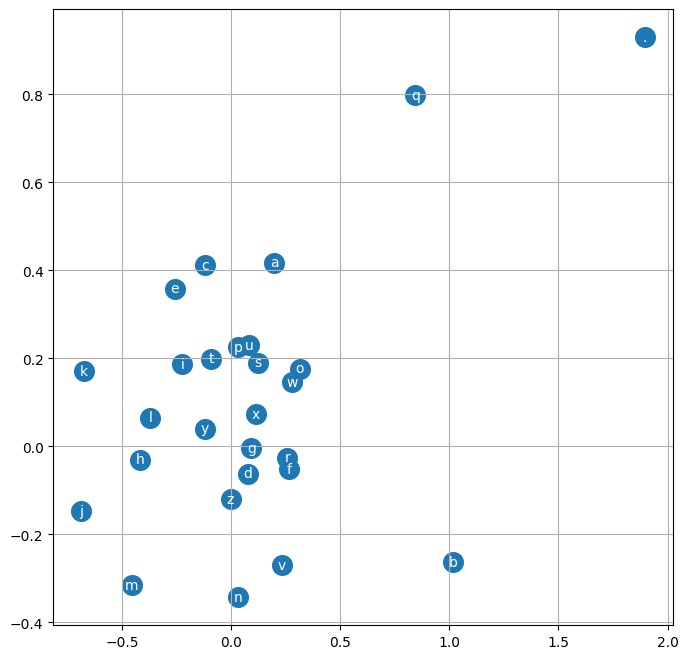

In [185]:
# visualize the embedding vectors, before we scale up the embedding size from two because we'd like to make this bottleneck potentially go away
plt.figure(figsize=(8, 8))
plt.scatter(C[:,0].data.cpu(), C[:,1].data.cpu(), s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].cpu().item(), C[i, 1].cpu().item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

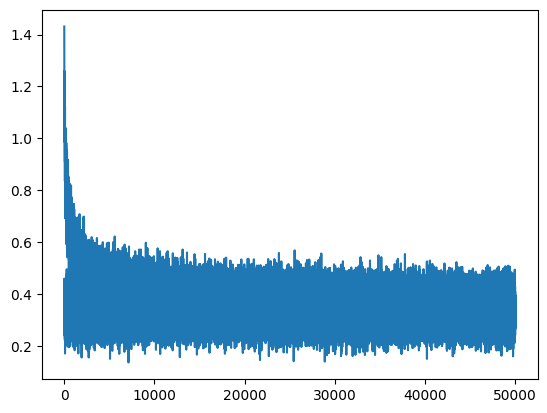

In [191]:
# after 2 more runs of 0.1 learning rate with both with each having50000 steps
plt.plot(stepi, lossi)

In [192]:
# the total loss for training split

embeddings = C[X_train]  # (182625, 3, 10)
h = torch.tanh(embeddings.view(-1, 30) @ W1 + b1)  # (32, 200)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.1651, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
# see how the training and the validation performance are starting to slightly slowly depart

In [193]:
# the total loss for validation split

embeddings = C[X_dev]  # (22655, 3, 10)
h = torch.tanh(embeddings.view(-1, 30) @ W1 + b1)  # (32, 200)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y_dev)
loss

tensor(2.1977, device='cuda:0', grad_fn=<NllLossBackward0>)

In [ ]:
# maybe we're getting the sense that the neural net is getting good enough or that number of parameters is large enough that we are slowly starting to overfit

# but yeah basically you would be running lots of experiments and then you are slowly scrutinizing whichever ones give you the best depth performance and then once you find all the hyper parameters that make your dev performance good 
# you take that model and you evaluate the test set performance a single time and that's the number that you report in your paper or wherever


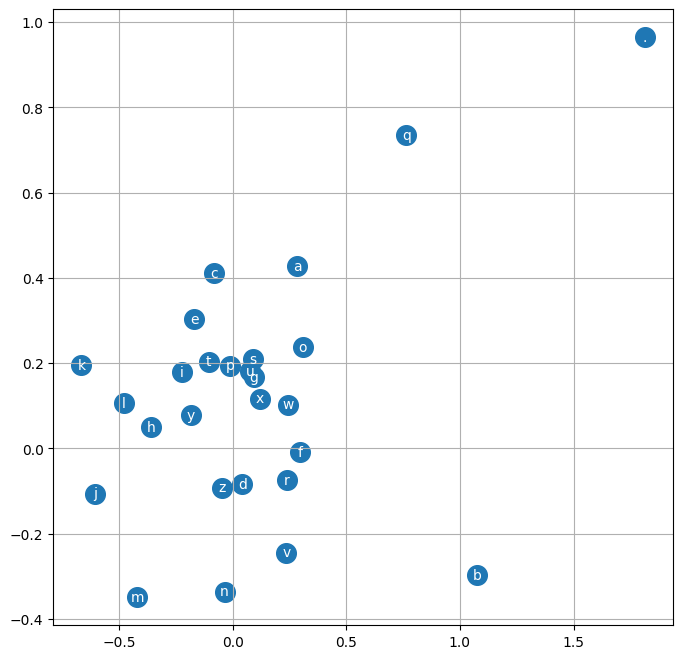

In [194]:
# let's see the embeddings plot
# visualize the embedding vectors, before we scale up the embedding size from two because we'd like to make this bottleneck potentially go away
plt.figure(figsize=(8, 8))
plt.scatter(C[:,0].data.cpu(), C[:,1].data.cpu(), s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].cpu().item(), C[i, 1].cpu().item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [196]:
X_train.shape, Y_train.shape

(torch.Size([182625, 3]), torch.Size([182625]))

In [202]:
# We now increase the embeddings dimensions

g = torch.Generator().manual_seed(2147483647) 
C = torch.randn((27, 10), generator=g).to(device) # we changed here from 2 to 10 dimensions
W1 = torch.randn((30, 200), generator=g).to(device) # because we have size of X to be 3 (block_size?) we multiply the increased dimension 10 x 3 to get 30 input which will go into the hidden layer
b1 = torch.randn(200, generator=g).to(device)
W2 = torch.randn((200, 27), generator=g).to(device) # we make the hidden layer a bit smaller to 200 neurons
b2 = torch.randn((27), generator=g).to(device)

# Define the parameters list
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [203]:
# moved this out so we won't wipe out our loss stats when we rerun the training cell from below
lri = []
lossi = []
stepi = []

In [204]:
# we added learning rate optimization -> learning_rate = 0.1 if i < 100000 else 0.01

for i in range(200000):
    #with torch.cuda.device(device):
        
        # minibatch construct
        ix = torch.randint(0, X_train.shape[0], (32,))

        # Forward pass
        embeddings = C[X_train[ix]]  # (182625, 3, 10)
        h = torch.tanh(embeddings.view(-1, 30) @ W1 + b1)  # (32, 200) Here we have to be carefull, because of the hardcoded 6 -- h = torch.tanh(embeddings.view(-1, 6) -- , this should be 30 now
        logits = h @ W2 + b2  # (32, 27)

        loss = F.cross_entropy(logits, Y_train[ix])
        

        # Backward pass
        for p in parameters:
            p.grad = None
        loss.backward()

        # Update
        #learning_rate = learn_rate_exponent[i]
        learning_rate = 0.1 if i < 100000 else 0.01         # learning rate optimization
        for p in parameters:
            p.data += -learning_rate * p.grad

        # # track stats
        # lri.append(learn_rate[i]) # added i here
        lossi.append(loss.log10().item())               # we added here log10()
        stepi.append(i)
    
#print(loss.item())


In [205]:
# the total loss for training split

embeddings = C[X_train]  # (182625, 3, 10)
h = torch.tanh(embeddings.view(-1, 30) @ W1 + b1)  # (32, 200)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.1290, device='cuda:0', grad_fn=<NllLossBackward0>)

In [206]:
# the total loss for validation split

embeddings = C[X_dev]  # (22655, 3, 10)
h = torch.tanh(embeddings.view(-1, 30) @ W1 + b1)  # (32, 200)
logits = h @ W2 + b2  # (32, 27)
loss = F.cross_entropy(logits, Y_dev)
loss

tensor(2.1667, device='cuda:0', grad_fn=<NllLossBackward0>)

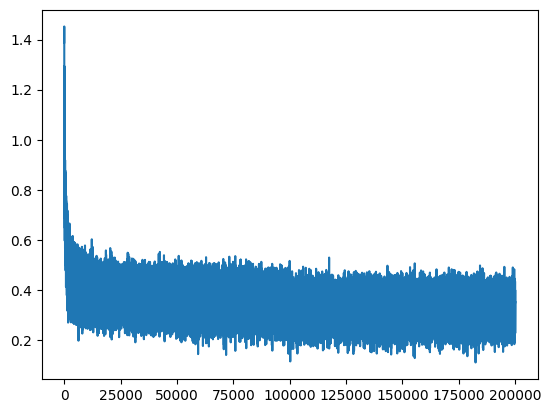

In [207]:
plt.plot(stepi, lossi)

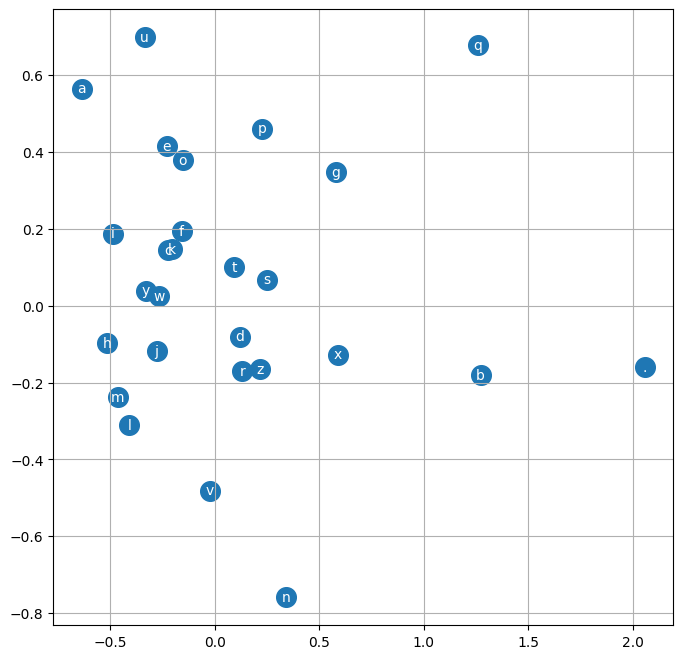

In [208]:
# let's see the embeddings plot

plt.figure(figsize=(8, 8))
plt.scatter(C[:,0].data.cpu(), C[:,1].data.cpu(), s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].cpu().item(), C[i, 1].cpu().item(), itos[i], ha="center", va="center", color="white")
plt.grid('minor')

In [ ]:
# loss 2.16 on validation 
# Now, you can start optimizing the hyperparameters

# you have quite a few knobs available to you
# to surpass this number:
# 1. you can change the number of neurons in the hidden layer of the model
# 2. you can change the dimensionality of the embedding lookup table
# 3. you can change the number of characters that are feeding in as an input as the context into this model
# 4. you can change the details of the optimization, how long are we running (steps), 
# 6. what is the learning rate and how does it change over time
# 7. you can change the batch size (you may be able to actually achieve a much better convergence speed in terms of how many minutes or seconds it takes to train the model)


## Inference time

In [218]:
# sample from the model

g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ... and until we meet the 0th character again, 
    while True:
        embeddings = C[torch.tensor([context])].cpu() # (1, blocksize , d) # we're going to embed the current context using the embedding table C; usually here, the first dimension was the size of the training set, but here we're only using a single example that we're generating
        h = torch.tanh(embeddings.view(1, -1).cpu() @ W1.cpu() + b1.cpu())
        logits = h @ W2.cpu() + b2.cpu()
        probs = F.softmax(logits, dim=1) # exponentiates the logits and sum them to one and as with cross_entropy, it is careful so there's no overflows
        ix = torch.multinomial(probs, num_samples=1, generator=g).item() # once we have the probabilities, we sample from them, using multinomial to get our next index and then
        context = context[1:] + [ix] # we shift our the context window to append the index and record it

        out.append(ix)

        if ix == 0:
            break

    print(''.join(itos[i] for i in out)) # we decode all the integers to strings and printe them out

eria.
kayah.
see.
medhayla.
rethrushadrajou.
zeridgelin.
shy.
jen.
eden.
estanarielyziollya.
cayshah.
rixhiviel.
kendretlynn.
nochorius.
kynder.
yarue.
els.
kayshia.
kyla.
hal.
